 ## Compte Rendu TP2: Interpolation Numérique

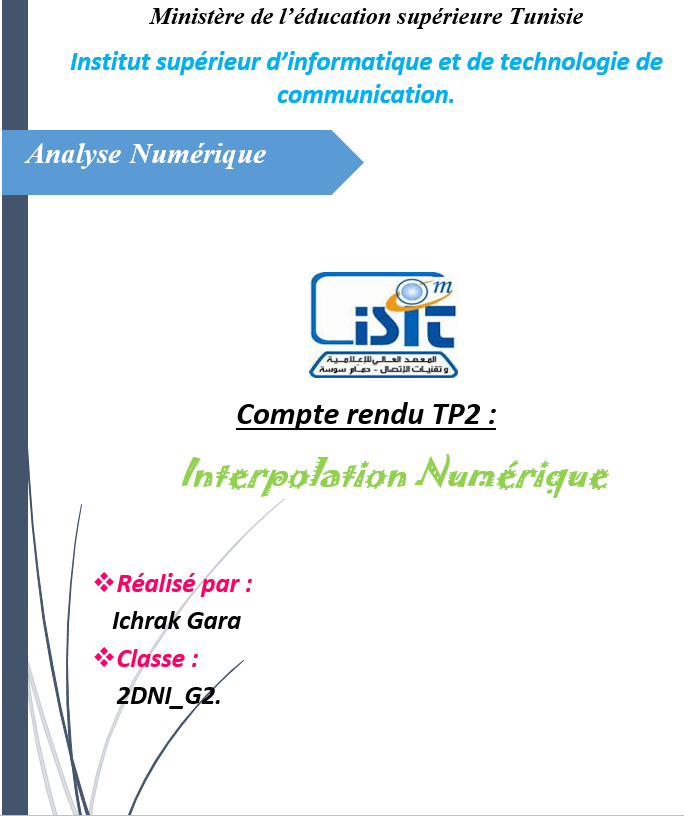

# L'interpolation:

En analyse numérique (et dans son application algorithmique discrète pour le calcul numérique), l'interpolation est une opération mathématique permettant de remplacer une courbe ou une fonction par une autre courbe (ou fonction) plus simple, mais qui coïncide avec la première en un nombre fini de points (ou de valeurs) donnés au départ.

<div class="alert alert-success">
=> elle désigne la construction d’une courbe à partir de la donnée d’un nombre fini de points.
</div>

il existe différents types de l'interpolation:
- Interpolation linéaire.
- Interpolation cosinus.
- Interpolation polynomiale.
- Interpolation polynomiale par parties.

# Interpolation polynomiale:

### Définition:

En mathématiques, en analyse numérique, l'interpolation polynomiale est une technique d'interpolation d'un ensemble de données ou d'une fonction par un polynôme. En d'autres termes, étant donné un ensemble de points (obtenu, par exemple, à la suite d'une expérience), on cherche un polynôme qui passe par tous ces points, et éventuellement vérifie d'autres conditions, de degré si possible le plus bas.

## polynôme d'interpolation de Lagrange:

# Exercice 1:

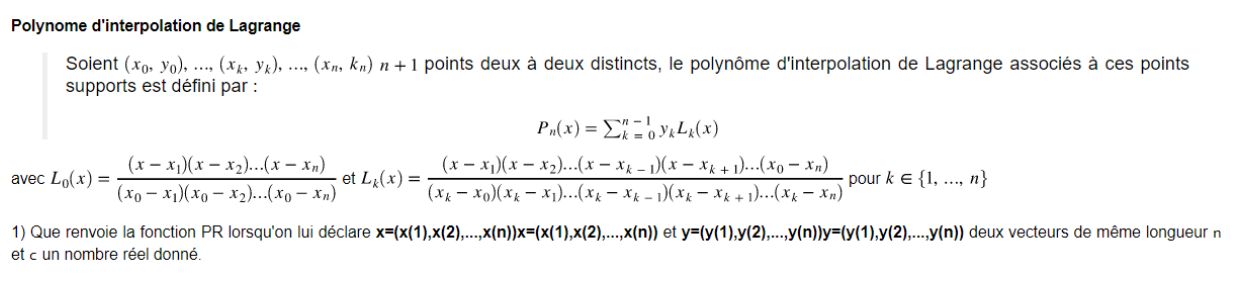

###### Question 1:

#### code en python:

In [1]:
from numpy import prod
def PR(x,y,c):
    s=[]
    n=len(x)
    
    for j in range (n):
        
        L = [c-xx for xx in x]
        for k in range(n):
            if (k == j):
                L[k]= 1
            else:
                L[k] = L[k]/(x[j] - x[k])
                
        s.append(y[j] * prod(L))
        
    return sum(s)

In [2]:
x=[1,2,3,4]
y=[-1,0,2,1]
for i in x:
    print(PR(x,y,i))

-1.0
0.0
2.0
1.0


<div class="alert alert-success">
On a comme affichage, les valeurs du vecteur y (-1,0,2,1)
</div>

# Le fonctionnement du code:

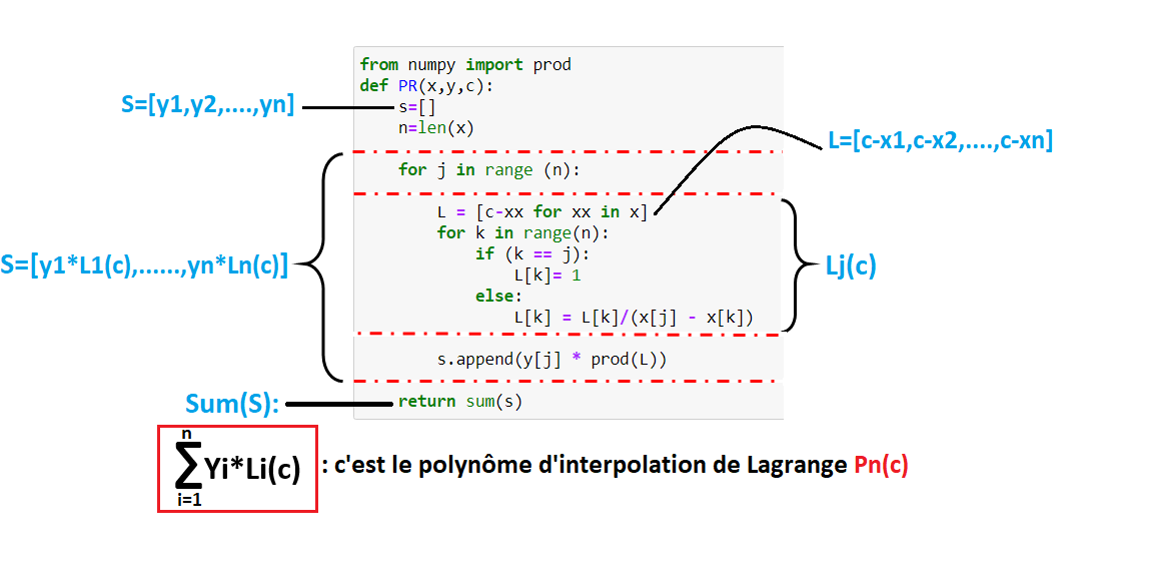

## Interprétation:

<div class="alert alert-success">
en fait ce programme, calcule le polynôme d'interpolation de Lagrange appliqué à c "Pn(c)"
</div>

###### Question 3:

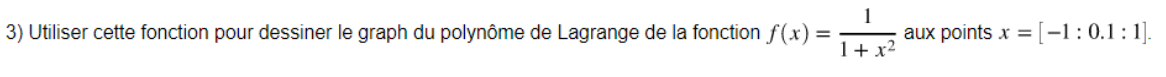

#### code en python:

In [3]:
#importation
import matplotlib.pyplot as plt
import numpy as np


x=np.arange(-1,1,0.1)
f1=lambda x: 1/(1+x**2)
y=f1(x)
pt=[]
t=np.linspace(-1,1,100)
for u in range(len(t)) :
    pt.append(PR(x,y,t[u]))

### représentation graphique:

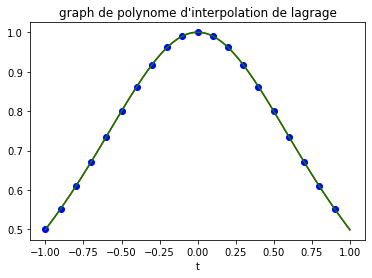

In [4]:
plt.plot(t,pt,'r',x,y,'bo',t,f1(t),'g')
plt.title("graph de polynome d'interpolation de lagrage")
plt.xlabel("t")
plt.show()

<div class="alert alert-success">
Les polynomes de Lagrange forment une base, on en déduit que tout polynome de degré n s’écrit comme combinaison linéaire des Li.
</div>

###### Question 4:

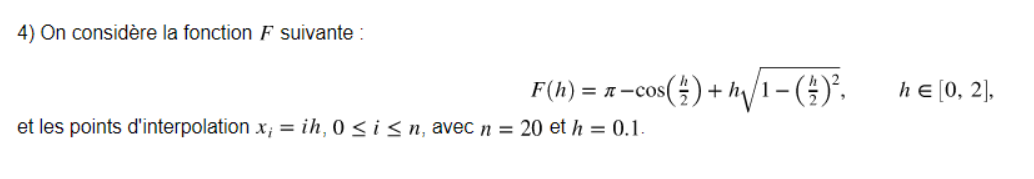

#### 4.1

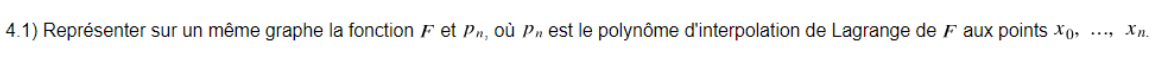

#### code en python:

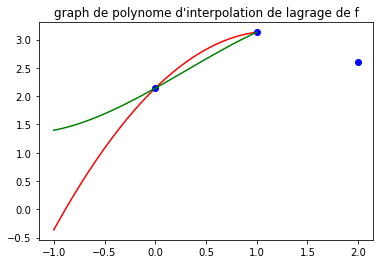

In [5]:
from math import *

x=np.linspace(0,2,3)
f2=lambda x:pi-cos(x/2)+x*sqrt(1-(x/2)**2)
y2=[f2(xx) for xx in x]
pn=[]
t=np.linspace(-1,1,100)
for u in range(len(t)):
    pn.append(PR(x,y2,t[u]))
y3=[f2(tt) for tt in t]
plt.plot(t,pn,'r',x,y2,'bo',t,y3,'g')
plt.title("graph de polynome d'interpolation de lagrage de f")
plt.show()

#### 4.2

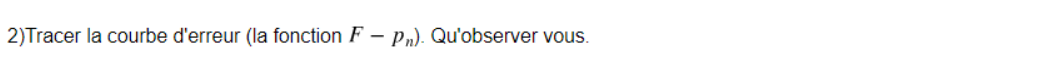

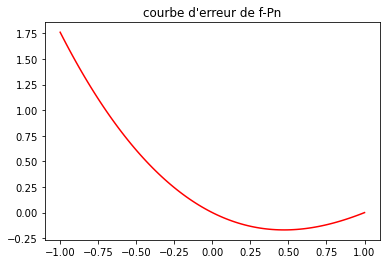

In [6]:
y4=[y3[i]-pn[i] for i in range(len(y3))]
plt.plot(t,y4,'r')
plt.title("courbe d'erreur de f-Pn")
plt.show()

<div class="alert alert-success">
=> Cette courbe représente  𝑙′𝑒𝑟𝑟𝑒𝑢 𝑟𝑑′𝑖𝑛𝑡𝑒𝑟𝑝𝑜𝑙𝑎𝑡𝑖𝑜𝑛  de Lagrange lors de l'approximation d'une fonction f, c'est-à-dire : lorsque yi = f(xi)
</div>

# observation:

<div class="alert alert-success">
les avantages de l'interpolation de Lagrange:
</div>

- Interpolation **`naturelle`** des points de controle
- Equation relativement **`simple`**
- Reconstruction **`lisse`** de données **`parfaites`**

<div class="alert alert-warning">
les inconvénients de l'interpolation de Lagrange
</div>

- Support global des fonctions de base => **`influence globale des points de controle sur la courbe`**
- Le **`degré`** est lié au nombre de points de controle
- Difficulté de controle des conditions aux limites
- Forte tendance à osciller sur des données bruitées

# Exercice 2:

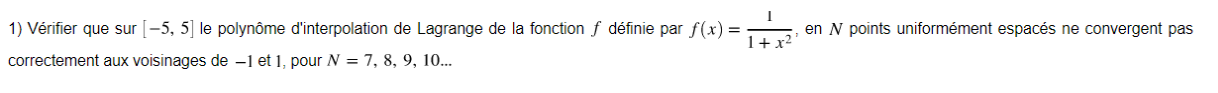

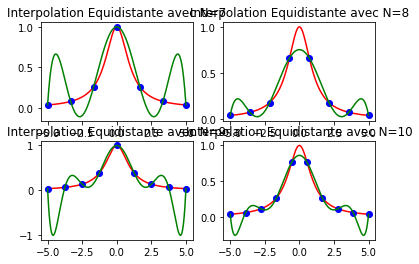

In [7]:
N1=7
N2=8
N3=9
N4=10
x1=np.linspace(-5,5,N1)
x2=np.linspace(-5,5,N2)
x3=np.linspace(-5,5,N3)
x4=np.linspace(-5,5,N4)
f=lambda x: 1/(1+x**2)
y1=f(x1)
y2=f(x2)
y3=f(x3)
y4=f(x4)
p1=np.polyfit(x1,y1,N1-1)
p2=np.polyfit(x2,y2,N2-1)
p3=np.polyfit(x3,y3,N3-1)
p4=np.polyfit(x4,y4,N4-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',x1,y1,'ob',t,np.polyval(p1,t),'g')
plt.title("Interpolation Equidistante avec N=7")

plt.subplot(2,2,2)
plt.plot(t,f(t),'r',x2,y2,'ob',t,np.polyval(p2,t),'g')
plt.title("Interpolation Equidistante avec N=8")

plt.subplot(2,2,3)
plt.plot(t,f(t),'r',x3,y3,'ob',t,np.polyval(p3,t),'g')
plt.title("Interpolation Equidistante avec N=9")

plt.subplot(2,2,4)
plt.plot(t,f(t),'r',x4,y4,'ob',t,np.polyval(p4,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()


## Interprétation:

<div class="alert alert-success">
Un phénoméne d'oscillation apparait et s'amplifie lorsque n augmente. Ce phénoméne a été clairement mis en évidence et expliqué par Carl Runge en 1901.
</div>

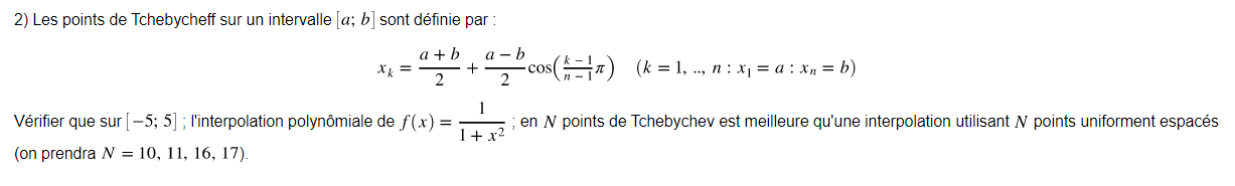

In [8]:
def tcheb(a,b,n):
    v=[]
    for k in range(1,n+1):
        v.append((a+b)/2+(a-b)/2*cos((k-1)/(n-1)*pi))
    return v

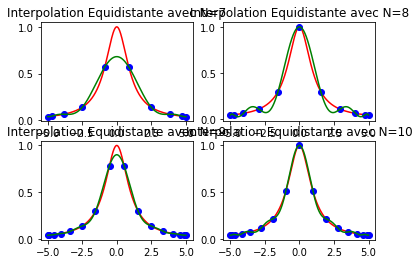

In [9]:
import matplotlib.pyplot as plt
import numpy as np

N5=10
N6=11
N7=16
N8=17
Xt5=tcheb(-5,5,N5)
Xt6=tcheb(-5,5,N6)
Xt7=tcheb(-5,5,N7)
Xt8=tcheb(-5,5,N8)
f=lambda x: 1/(1+x**2)
Yt5=[f(xt) for xt in Xt5]
Yt6=[f(xt) for xt in Xt6]
Yt7=[f(xt) for xt in Xt7]
Yt8=[f(xt) for xt in Xt8]
pt5=np.polyfit(Xt5,Yt5,N5-1)
pt6=np.polyfit(Xt6,Yt6,N6-1)
pt7=np.polyfit(Xt7,Yt7,N7-1)
pt8=np.polyfit(Xt8,Yt8,N8-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt5,Yt5,'ob',t,np.polyval(pt5,t),'g')
plt.title("Interpolation Equidistante avec N=7")

plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt6,Yt6,'ob',t,np.polyval(pt6,t),'g')
plt.title("Interpolation Equidistante avec N=8")

plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt7,Yt7,'ob',t,np.polyval(pt7,t),'g')
plt.title("Interpolation Equidistante avec N=9")

plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt8,Yt8,'ob',t,np.polyval(pt8,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()

<div class="alert alert-success">
Lorsque N augmente, plus nous arrivons à la fonction F est égal à Pt
</div>

<div class="alert alert-success">
une façon d’ameliorer la qualité du résultat est de choisir les points d’interpolation de Tchebycheff.
</div>

## conclusion:

<div class="alert alert-warning">
Le phénoméne de Runge peut-étre considérablement atténué en choisissant judicieusement les points
d’évaluation. En particulier, on peut démontrer qu’en choisissant les racines des polynomes de
Chebyshev (Tchebychev) comme points d’évaluation, on minimise les écarts entre la fonction
interpolée et le polynome d’interpolation.
</div>

# Interpolation de Newton:

### Définition:

L'interpolation newtonienne est une approximation polynomiale permettant d'obtenir le polynôme de Lagrange comme équation de la courbe en connaissant ses points.

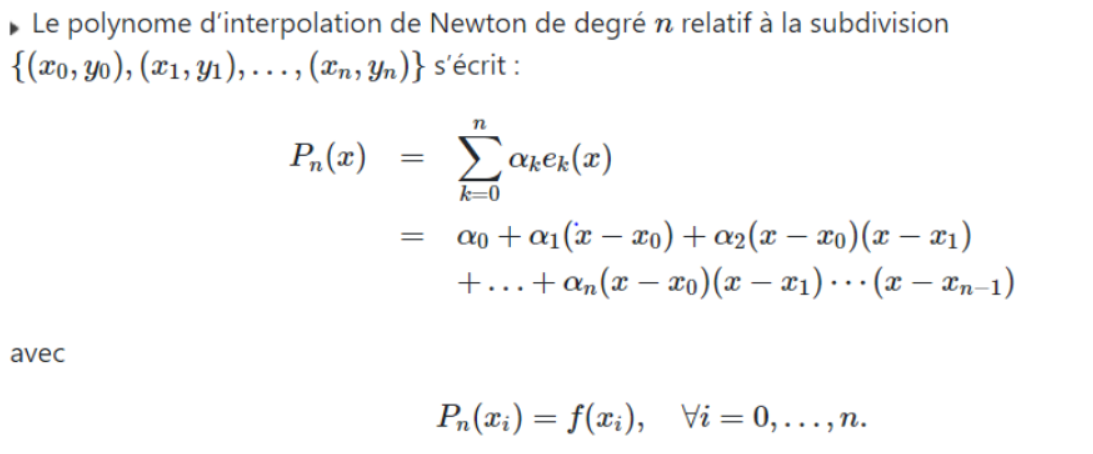

# Exercice 3:

In [10]:
def intN(x,y):
    m=len(x)
    
    np.copy(y)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m] = np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f
    

In [11]:
x=[-1,0,2,5]
y=[6,1,3,66]
print(intN(x,y))

[ 0.         -5.          0.66666667 10.5       ]


In [12]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [13]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
f=intNval(x,y,t)
print(f)

[   7. -118.   27.  838.]


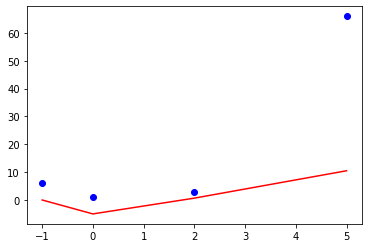

In [14]:
f=intN(x,y);
plt.plot(x,f,'r',x,y,'ob')
plt.show()

In [15]:
p=intNval(x,y,t);
print(p[0])

7.0


Les différences divisées interviennent dans la formulation du théorème d'interpolation de Newton, qui donne une expression particulière du polynôme d'interpolation de Lagrange, permettant par exemple de démontrer que toute fonction polynomiale est égale à sa série de Newton.

# Calcul du polynome à la main:

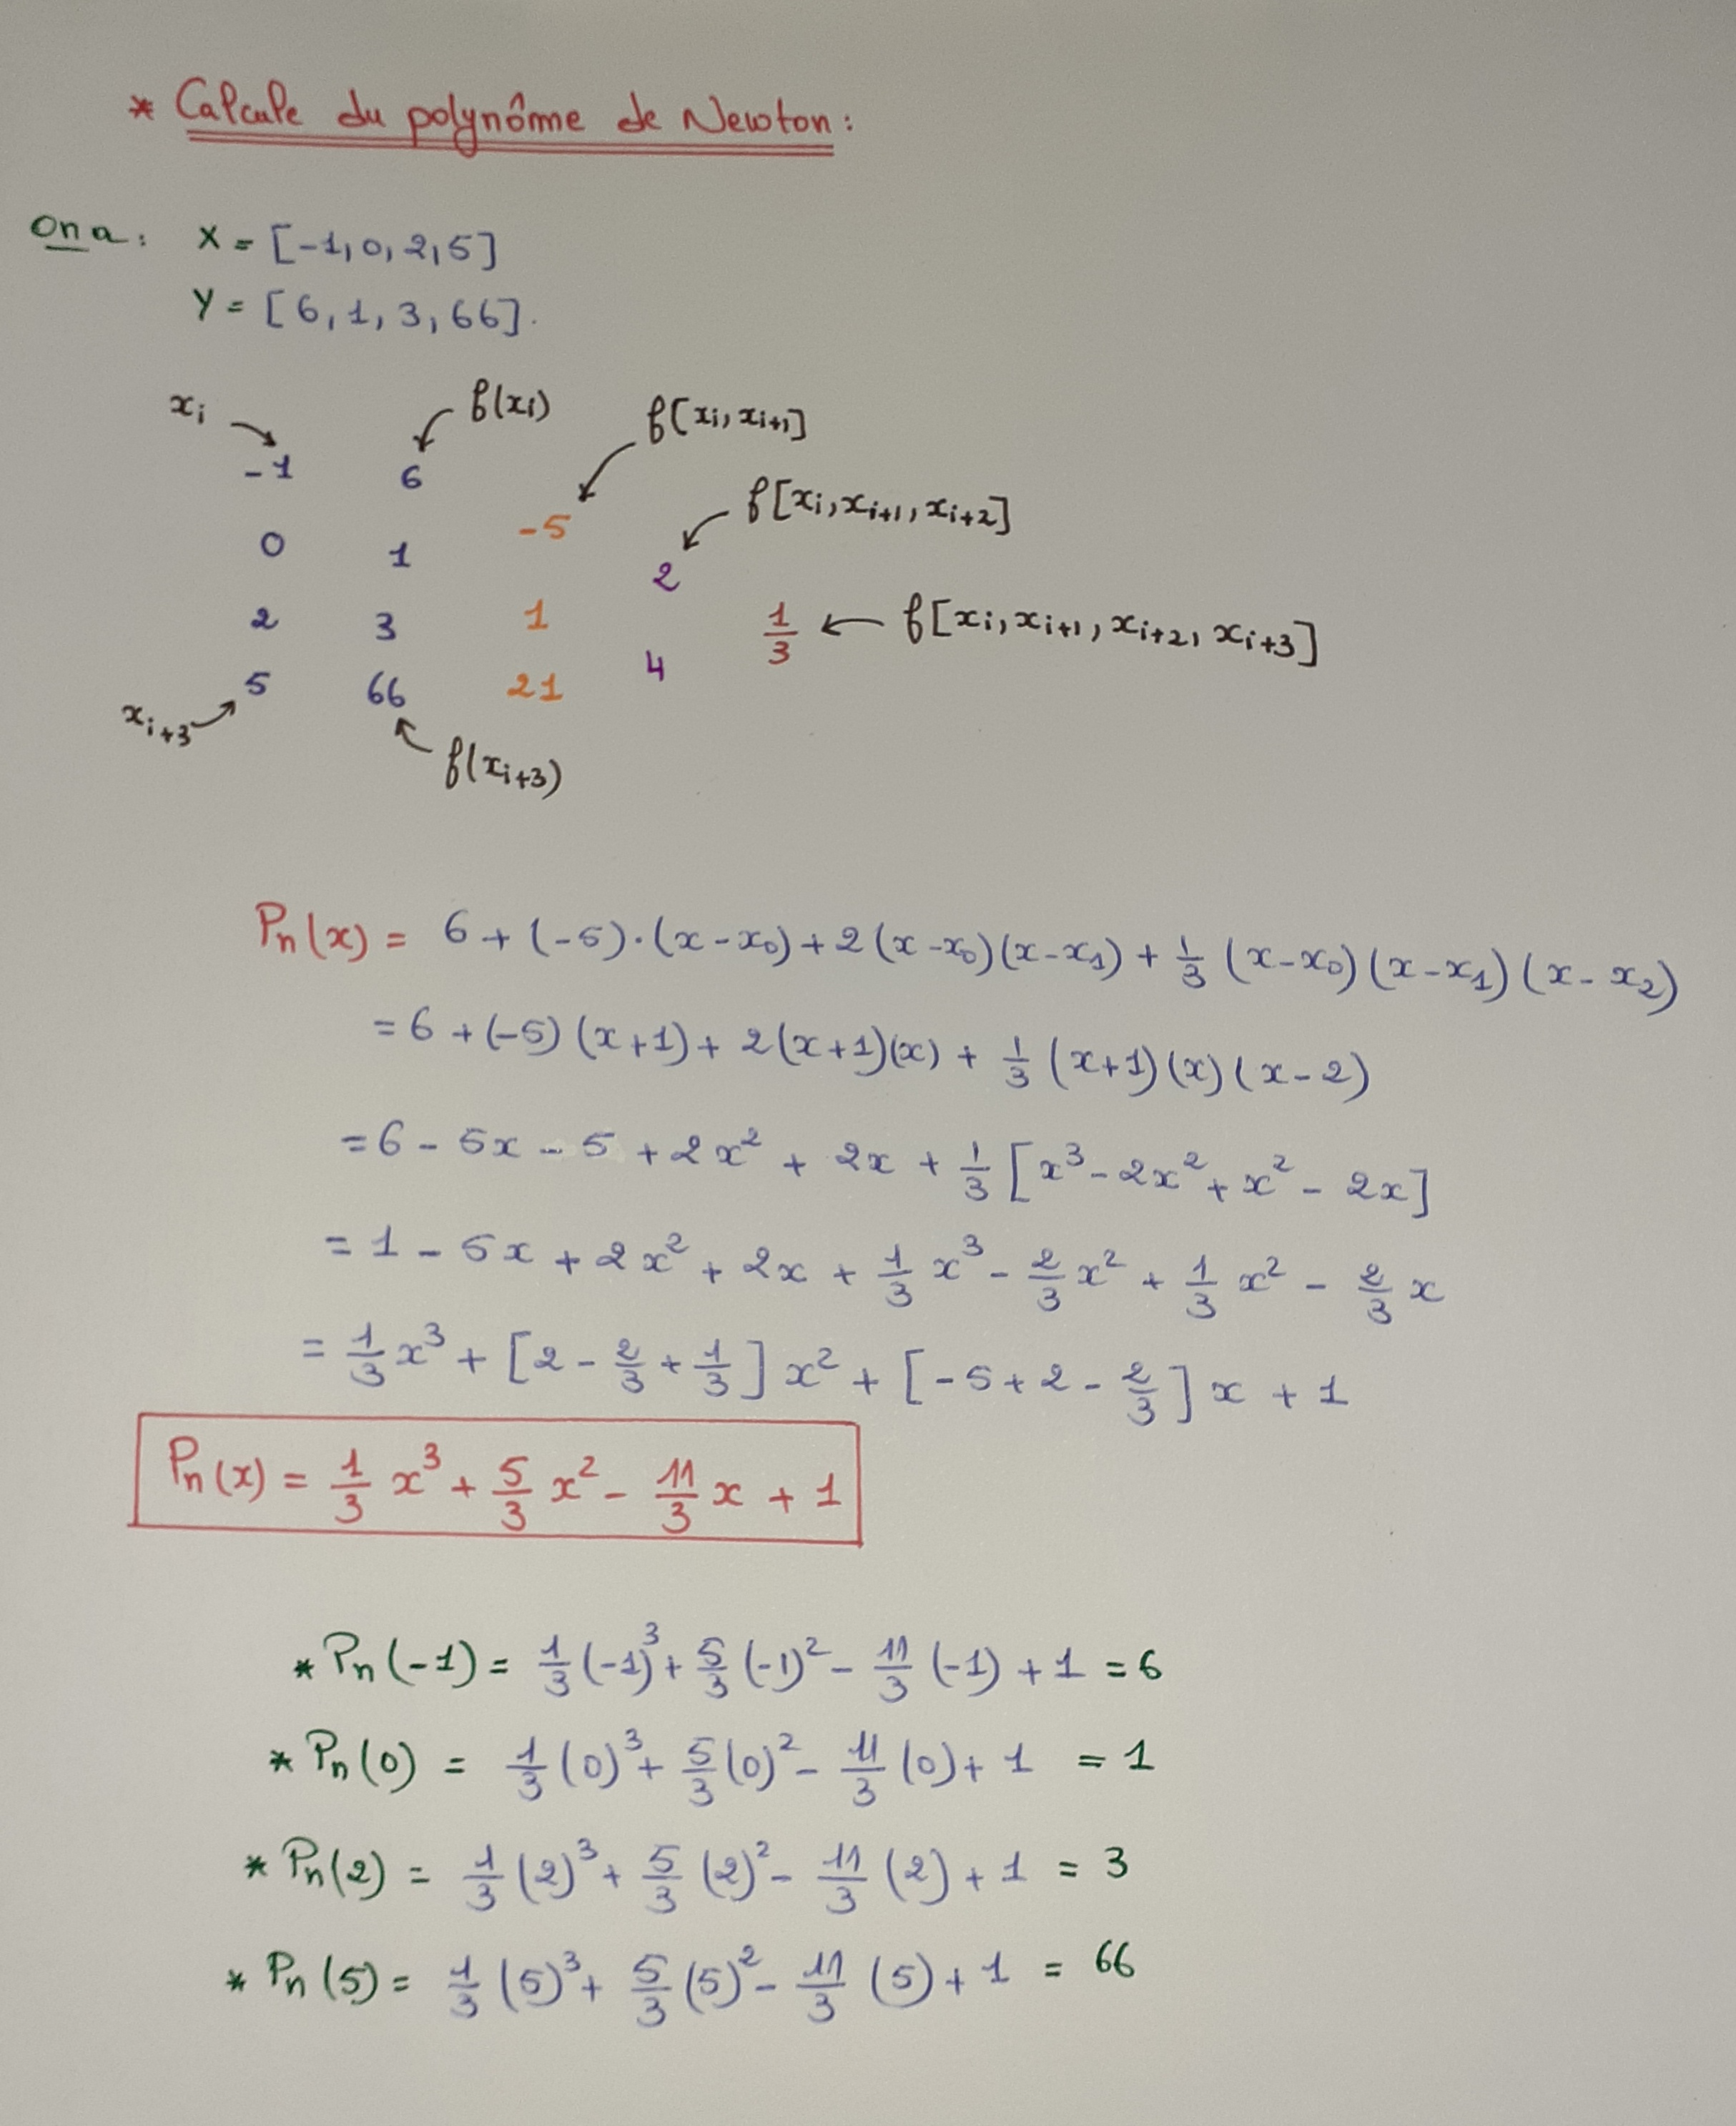

# Conclusion génerale:

L'interpolation polynomiale:
- évaluer la fonction en un point : **`Polynôme de Lagrange`**
- compiler la fonction : **`Polynôme de Newton`**